## GRIP - The Sparks Foundation
### Data Science and Businness Analytics Intern
### Author : Dharmik Vara
### Task 3 : Prediction using Decision Tree Algorithm

Problem : From the given ‘Iris’ dataset, predict the species.

In [25]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# Load Dataset

data = pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [27]:
# Drop Id columns as it's value is unique and not useful in prediction

data = data.drop('Id',axis=1)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [28]:
# Check for null values in dataset

data.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [29]:
data.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

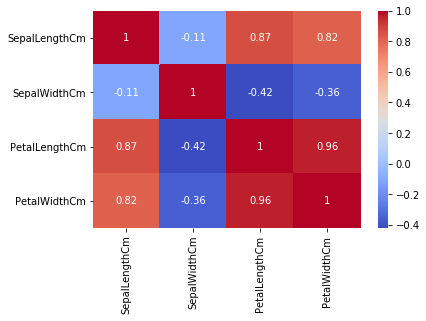

In [30]:
# Plotting correlation between attributes

sns.heatmap(data.corr(),cmap='coolwarm',annot=True)

In [31]:
# Encoding Categorical values

encode = {'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}
data['Category'] = data.Species.map(encode)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Category
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [32]:
# Bifurcating independent and dependent features in dataset

X = data.iloc[:,:-2]
y = data.iloc[:,-1]

In [34]:
# Splitting data into train set and test set

from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [35]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((105, 4), (105,), (45, 4), (45,))

In [36]:
# Model Fitting

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)

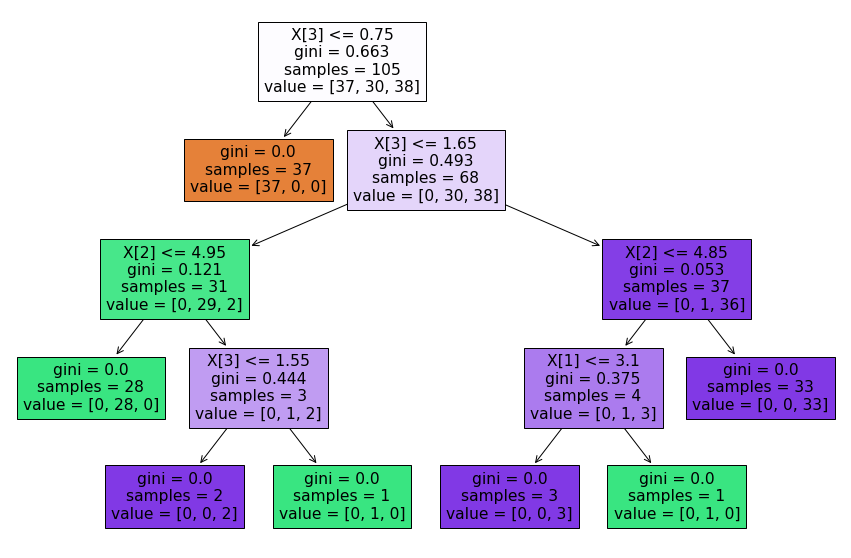

In [37]:
# Plotting tree for model

from sklearn import tree
plt.figure(figsize=(15,10))
fig = tree.plot_tree(classifier, filled = True)

In [38]:
# Evaluating model accuracy

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.9555555555555556
[[13  0  0]
 [ 0 19  1]
 [ 0  1 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.95      0.95      0.95        20
           2       0.92      0.92      0.92        12

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [40]:
# Checking for underfitting and overfitting

from sklearn.model_selection import cross_val_score
cv = cross_val_score(DecisionTreeClassifier(),X_train, y_train,cv=10,n_jobs=-1,verbose=1)
cv.mean(), cv.max(), cv.min()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished


(0.9709090909090909, 1.0, 0.9)

In [41]:
# Finding optimal parameters for model

from sklearn.model_selection import GridSearchCV
grid_param = {'max_features': ["auto", "sqrt", "log2"],
               'max_depth': np.arange(2,11,1),
               'min_samples_split': np.arange(2,10,1),
               'min_samples_leaf': np.arange(2,10,1),
              'criterion':['entropy','gini'],
              'splitter':["best", "random"]}
grid_param

{'max_features': ['auto', 'sqrt', 'log2'],
 'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
 'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
 'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
 'criterion': ['entropy', 'gini'],
 'splitter': ['best', 'random']}

In [48]:
grid = GridSearchCV(DecisionTreeClassifier(), param_grid=grid_param, cv=10, verbose=2, n_jobs=-1)
grid.fit(X_train, y_train)

Fitting 10 folds for each of 6912 candidates, totalling 69120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 896 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 2520 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 4784 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 7704 tasks      | elapsed:   19.3s
[Parallel(n_jobs=-1)]: Done 11264 tasks      | elapsed:   28.1s
[Parallel(n_jobs=-1)]: Done 15480 tasks      | elapsed:   38.3s
[Parallel(n_jobs=-1)]: Done 20336 tasks      | elapsed:   50.4s
[Parallel(n_jobs=-1)]: Done 25848 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 32000 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 38808 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 46256 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 54360 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 63104 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 69105 o

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'splitter': ['best', 'random']},
             verbose=2)

In [49]:
grid.best_score_

0.99

In [50]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'log2',
 'min_samples_leaf': 3,
 'min_samples_split': 3,
 'splitter': 'best'}

In [53]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=4, max_features='log2', min_samples_leaf=3,
                       min_samples_split=3)

In [57]:
# Fitting new model and evaluating its accuracy

model2 = DecisionTreeClassifier(max_depth=4, max_features='log2', min_samples_leaf=3, min_samples_split=3, splitter='best')
model2.fit(X_train, y_train)
predi = model2.predict(X_test)
print(accuracy_score(y_test, predi))
print(confusion_matrix(y_test, predi))
print(classification_report(y_test, predi))

0.9777777777777777
[[13  0  0]
 [ 0 19  1]
 [ 0  0 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.95      0.97        20
           2       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



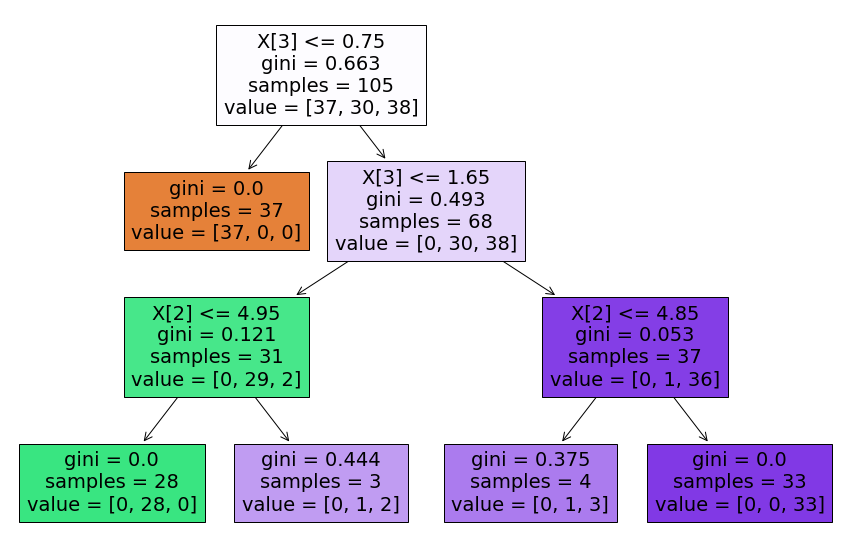

In [61]:
# Plotting new tree for model2

plt.figure(figsize=(15,10))
fig = tree.plot_tree(model2, filled=True)

### So after training model with right parameters, It not only increased the accuracy of model by decrementing error in prediction but also avoided overfitting.